# Исследование компьютерных игр


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель:**  
 выявить определяющие успешность игры закономерности выявить потенциально популярный продукт и спланировать рекламные кампании.
 
 **План проекта:**
 
 **1.Проведение обзора данных:**
  - Импорт необходимых библиотек
  - Чтение файлов  и получение общей информации о таблицах (info, head)
  - Графическое представление данных из таблиц
  - Выводы
  
 **2.Предобработка данных:**
  - Корректировка типов данных
  - Заполнение пропусков/удаление дубликатов при необходимости
  - Проверка на дубликаты
  - Выводы
  
 **3.Проведение исследовательского анализа данных:**
  - Аналитический анализ
  - Графический анализ
  - Корреляционный анализ
  - Выводы
  
 **4.Составление портрета пользователя каждого региона:**
  - Анализ потребителей по регионам 
  
 **5.Проверка гипотез:**
  
 **6.Общий вывод:**


**Описание данных:** 
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Проведение обзора данных


### Подготовка данных

In [1]:
#иморт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# чтение файла
data = pd.read_csv('games.csv')
    
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#получение общей информации о таблице (info, describe)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#корректировка названий столбцов (приведение к нижнему регистру)
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


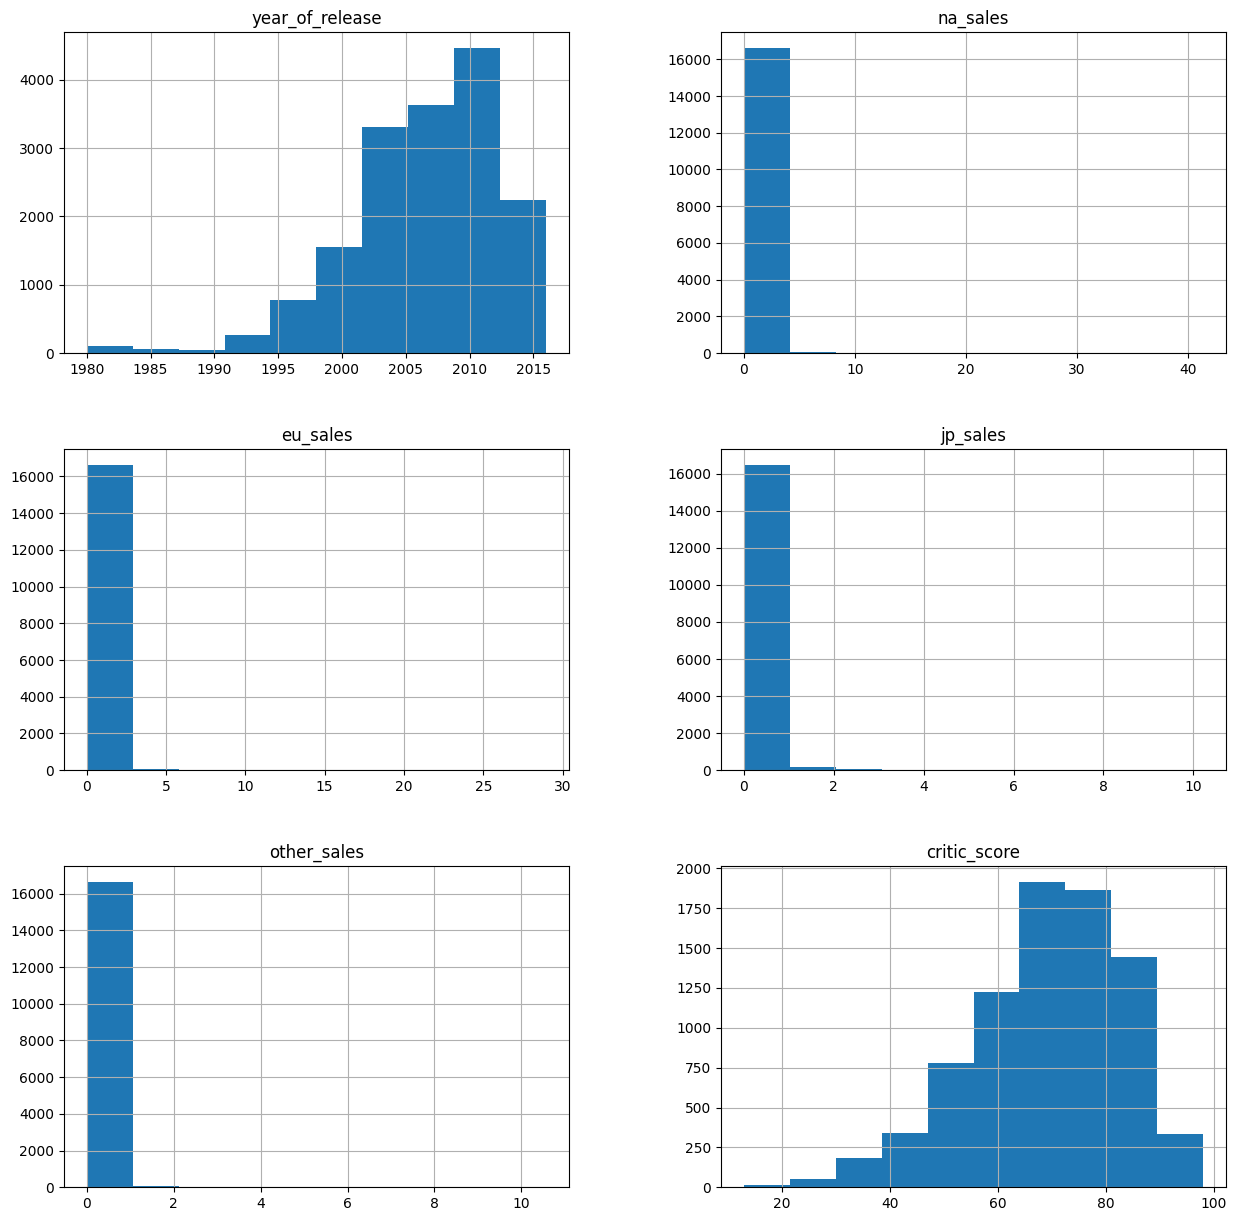

In [5]:
# графическое представление данных из таблиц
data.hist(figsize=(15, 15))
plt.show()

**Выводы:**

1. Из 11 столбцов заполнены полностью 5, остальные имеют пустые значения в данных.
2. Гистограммы с продажами (sale) представленs одним столбиком, что может говорить о выбросах в данных, требуется дополнительное изучение
3. Некорректный тип данных в столбце `User_Score`, `Critic_Score`,`Year_of_Release` 

### Предобработка данных:



Анализ каждого столбца по отдельности для понимания, какие действия целесообразно с ним провести

In [6]:
#просмотр количества пропусков в столбцах
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
#доля пропусков в столбцах
pd.DataFrame(round(data.isna().mean()*100)).sort_values(by = 0, ascending=False).style.background_gradient('coolwarm')

,0
critic_score,51.000000
user_score,40.000000
rating,40.000000
year_of_release,2.000000
name,0.000000
platform,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


In [8]:
#проверка строк с пустыми значениями в столбце 'name'
display(data[data['name'].isnull()])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#так как данные по этим двум строкам практически во всех столбцах отсутствуют - строки удалим
data = data.dropna(subset=['name']).reset_index(drop=True)
#проверка
print('Количество пропусков в столбце name:', data['name'].isna().sum())

Количество пропусков в столбце name: 0


В столбец `year_of_release` 2% строк с пустыми значениями, заменить на медиану или среднее не целесообразно, и лишь может искажить общую аналитику. Так как данных незначительно- удалим строки.

In [10]:
#удаление  строк с пустыми значениями в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])
#корректировка типов данных столбца 'year_of_release'(удаление данных после запятой, год не может быть дробным)
data['year_of_release'] = data['year_of_release'].astype(int)
#data['year_of_release'] = data['year_of_release'].map('{0:g}'.format)
print(data['year_of_release'].head())


0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64


Изучение столбцов 'critic_score' и 'user_score', где пропуски составляют 51% и 40%.
Как вариант, можно предположить, что систему рейтингов ввели не с начала ведения отчетности. Попробуем это предположение рассмотреть

In [11]:
#просмотр данных в колонке 'critic_score'
print(data['critic_score'].value_counts())
print(data['critic_score'].describe())

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64
count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


In [12]:
#просмотр строк с пустыми значениями в столбце 'critic_score'
display(data[data['critic_score'].isnull()].head(15))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [13]:
#проверка предположения, что строки с пропущенными данными относятся к начальным годам
#вывод на экран по годам количество игр, где  данные в 'critic_score' отсутствуют
data[data['critic_score'].isnull()].pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,14


Предположение, что рейтинг отсутствует у игр,выпущенные в более ранее года, можно смело отвергнуть. Такие строки присутствуют практически во всех годах. Соответственно, заменить на какой то год (медиана, мода, среднее) даже по отношению к определеному жанру будет неправильно. Заменим пустые значения на 0 (значения такого рейтинга нет в данных), в дальнейшем это позволит анализировать данные, не беря значение 0 в расчет.

In [14]:
#замена пустых значений на О в 'critic_score'
data['critic_score'] = data['critic_score'].fillna(0)
#проверка
print('Количество пропусков в столбце critic_score:', data['critic_score'].isna().sum())

Количество пропусков в столбце critic_score: 0


In [15]:
# просмотр данных в колонке 'user_score'
print(data['user_score'].value_counts())
print(data['user_score'].describe())

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
0.3       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64
count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object


"tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований."
Посмотрим также строки, где значения tbd на выявление каких то закономерностей(по годам/по жанру)


In [16]:
#просмотр строк со значением tbd
display(data[data['user_score']== 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0.0,tbd,E


In [17]:
#распределение по годам строк со значением tbd
data[data['user_score'] == 'tbd'].pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')


,name
year_of_release,
1997,1
1999,8
2000,43
2001,82
2002,192
2003,95
2004,107
2005,121
2006,124


In [18]:
#распределение по жанрам строк со значением tbd
data[data['user_score'] == 'tbd'].pivot_table(index = 'genre', values = 'name', aggfunc = 'count')

,name
genre,
Action,368
Adventure,156
Fighting,37
Misc,440
Platform,135
Puzzle,208
Racing,229
Role-Playing,30
Shooter,95


2376 строк со значением tbd с разными годами и разными жанрами. Взаимосвязь не наблюдается. Можно лишь предположить, что возможно пользователю предлагалось оценить игру и при нажатии пользователем кнопки "оценить позже" автоматически выставлялось значение tbd. 
Заменим значения на 0(с таким рейтингом только одна строка), это позволит в дальнейшем анализировать данные, без учета срок со значение 0. Также изменим тип данных на float

In [19]:
#просмотр строк с пустыми значениями в столбце 'user_score'
display(data[data['user_score'].isnull()].head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0.0,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0.0,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0.0,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,0.0,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,0.0,NaN,NaN


In [20]:
#замена значений tbd на 0
data['user_score'] = data['user_score'].replace('tbd', 0)
#замена пустых значений в столбце 'user_score' на 0 и изменение типа данных на float
data['user_score'] = data['user_score'].fillna(0).astype('float')
#проверка
print('Количество пропусков в столбце user_score:', data['user_score'].isna().sum())
print('Тип данных в столбце user_score:', data['user_score'].dtypes)

Количество пропусков в столбце user_score: 0
Тип данных в столбце user_score: float64


In [21]:
# просмотр данных в колонке 'rating'
print(data['rating'].value_counts())


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Значение абриавитур следующее.
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») 
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»
 - «K-A» («Kids to Adults»)— «Для детей и взрослых»
 
Рейтинги выставлются по стандартам Entertainment Software Rating Board, соответвенно заменить на "предполагаемые" в данном случае не правильно( хотя просится рейтинг «RP» («Rating Pending») — «Рейтинг ожидается»). В данном случае пустые значения оставим без изменения.

In [22]:
#проверка на явные дубликаты
print(data.duplicated().sum())

0


In [23]:
#расчет суммарных продаж во всех регионах и запишите их в отдельный столбец.
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
#проверка внесенных изменений
data.info()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales      

### Выводы: 


На этапе предобработки данных были внесены следующие корректировки в общую таблицу:
 - удаление строк с пустыми значения в столбце name
 - удаление данных после запятой в `year_of_release` 
 - замена пустых значений на 0 в столбцах `critic_score`, `user_score`  
 - изменение типа данных в столбце `user_score` на float
 - добавление столбца `total_sales` с суммарным значением продаж во всех регионах
 

##  Проведение исследовательского анализа данных

1. Для начала изучим динамику развития игровой индустрии по годам (как распределялись выпуски игр по годам):

<AxesSubplot:xlabel='year_of_release'>

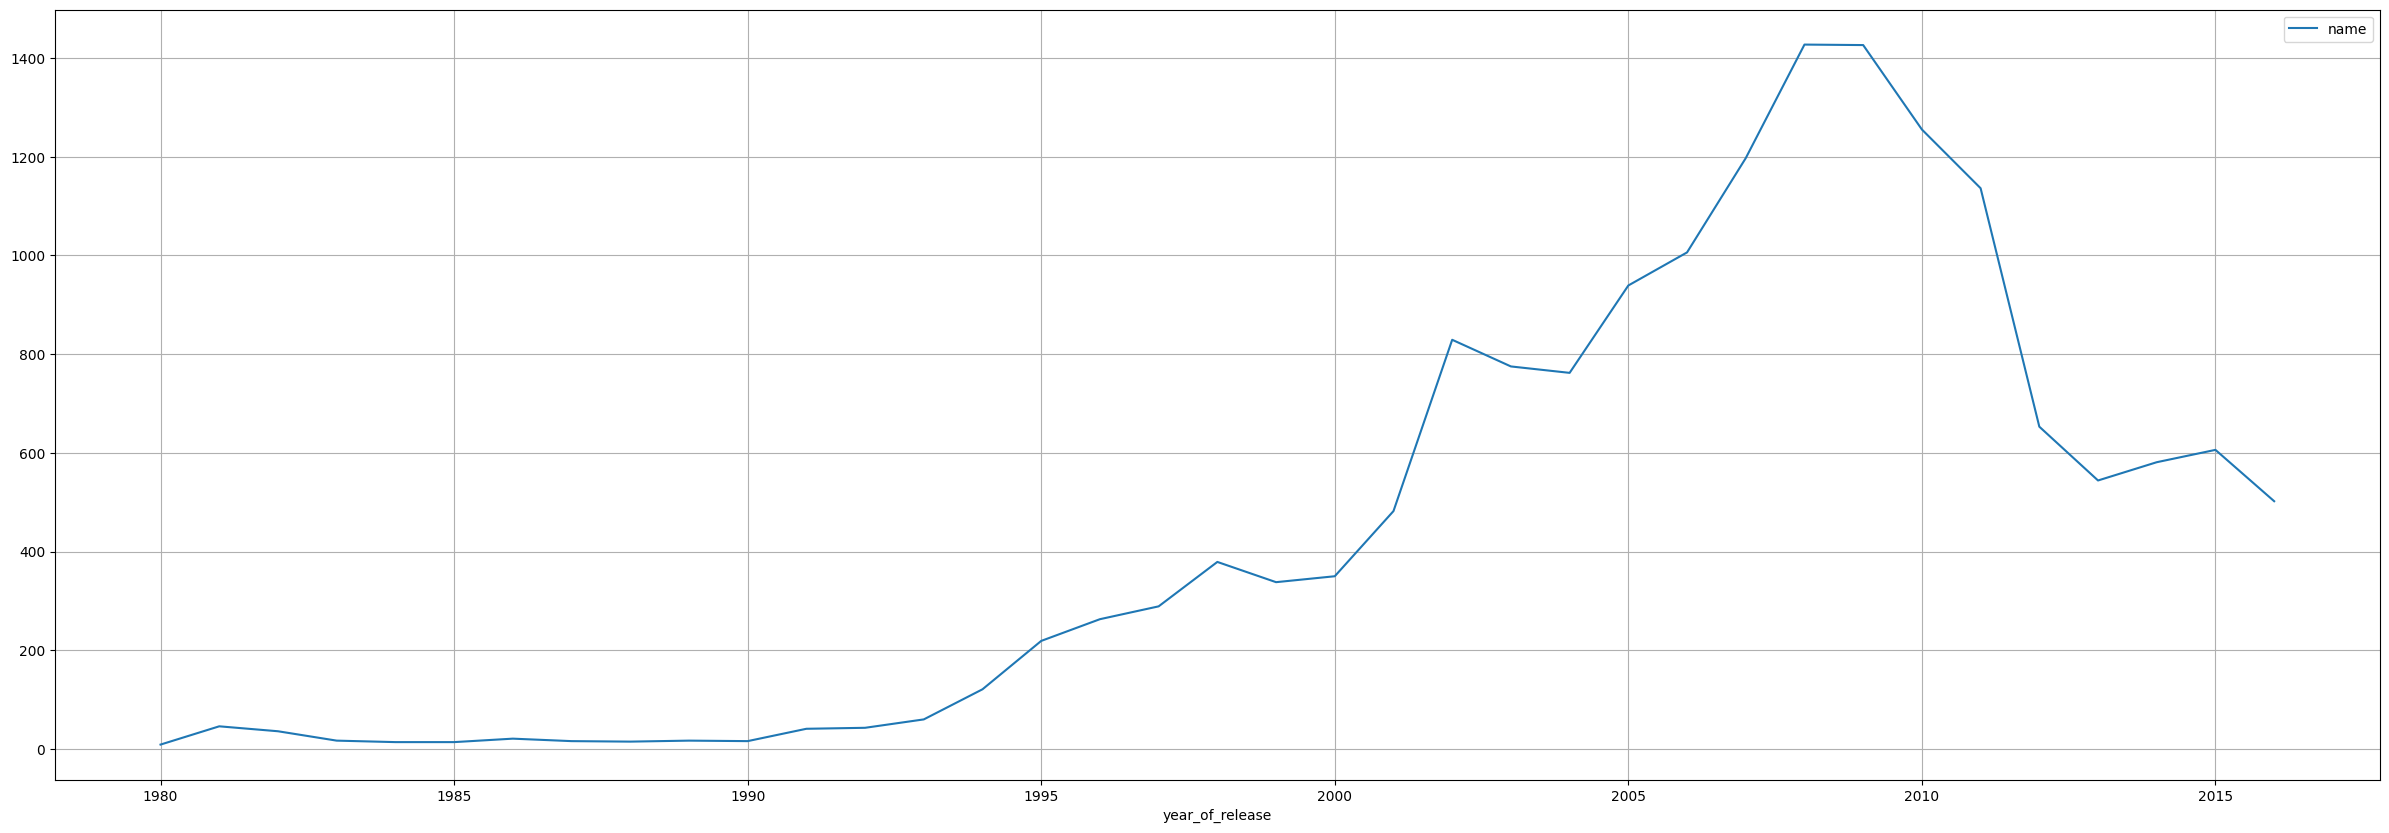

In [25]:
# построение линейной диаграммы выпуска игр по годам
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(grid = True,figsize = (30,10))

In [26]:
# представим более наглядно(числовые данные и столбчатый график)
# сводная таблица с расчетом количества игр по годам( для просмотра числовых значений)
games_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

print(games_year)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


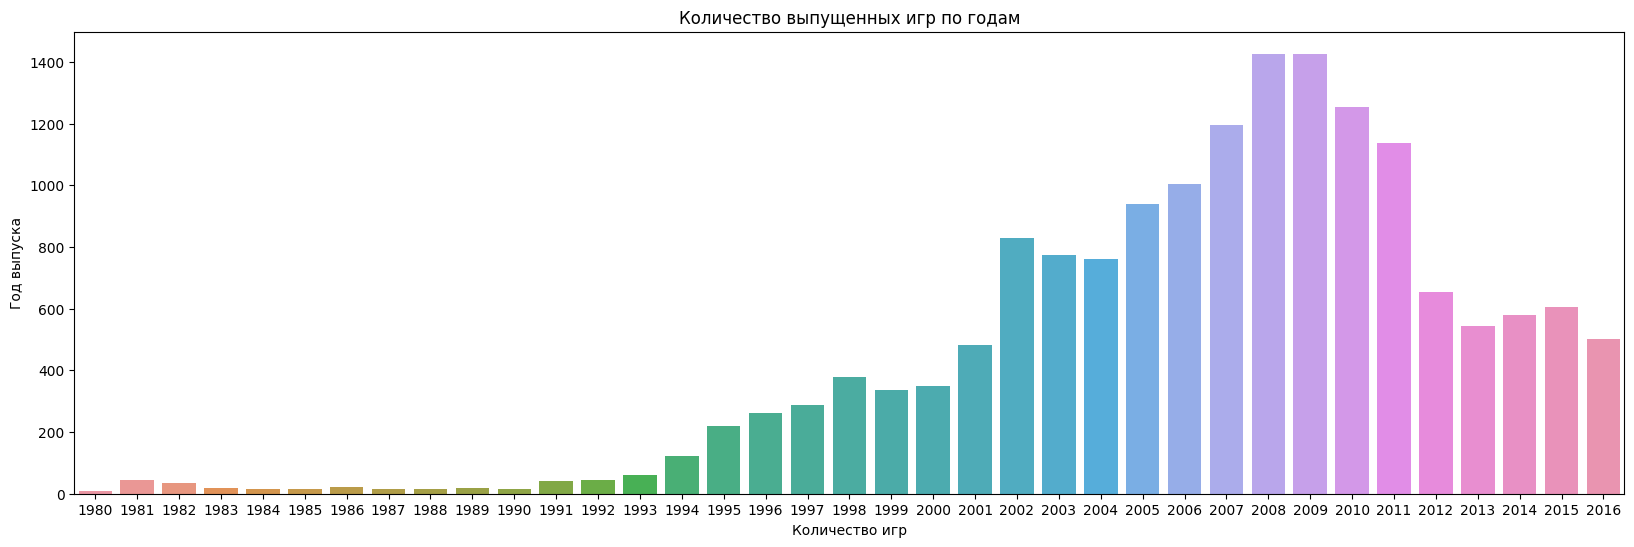

In [27]:
# график выпуска игр по годам( на основе сводной таблицы)
plt.figure(figsize = (20,6))
sns.barplot( x= games_year.index, y= 'name', data=games_year)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Количество игр')
plt.ylabel('Год выпуска')
plt.show()

**Вывод:**

Рост продаж компьютерных игр начинается с 1993 года, с началом популяризации персональных компьютеров,  пик приходится на 2008-2009 год, после чего начинается спад продаж. Возможно обусловленный кризисом 2008 года или развитием мобильных ганджетов. Т.е в дальнейшем анализе можно "опустить" значения до 95 года и использовать только с 1995г по 2016г.

2. Изучение продаж по платформам. Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим график распределение по годам.

<AxesSubplot:xlabel='platform'>

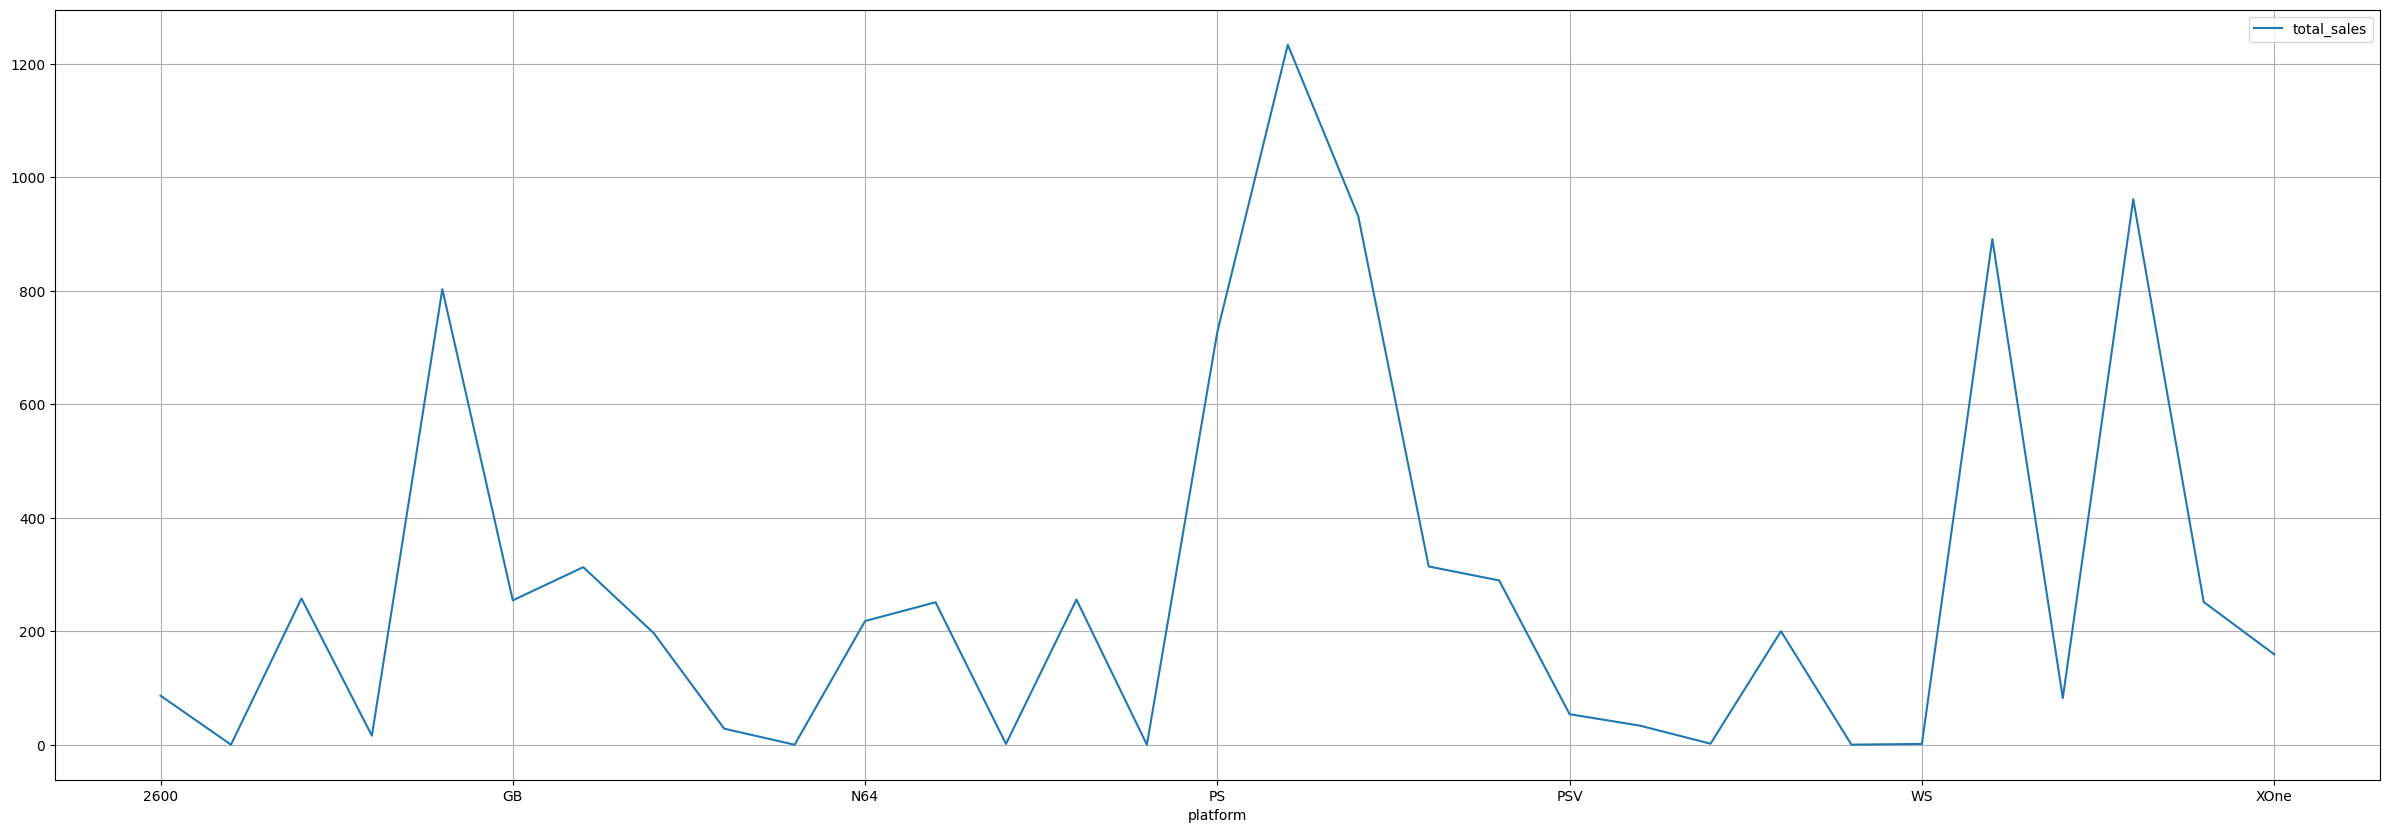

In [28]:
# построение линейной диаграммы выпуска игр по годам
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid = True,figsize = (30,10))

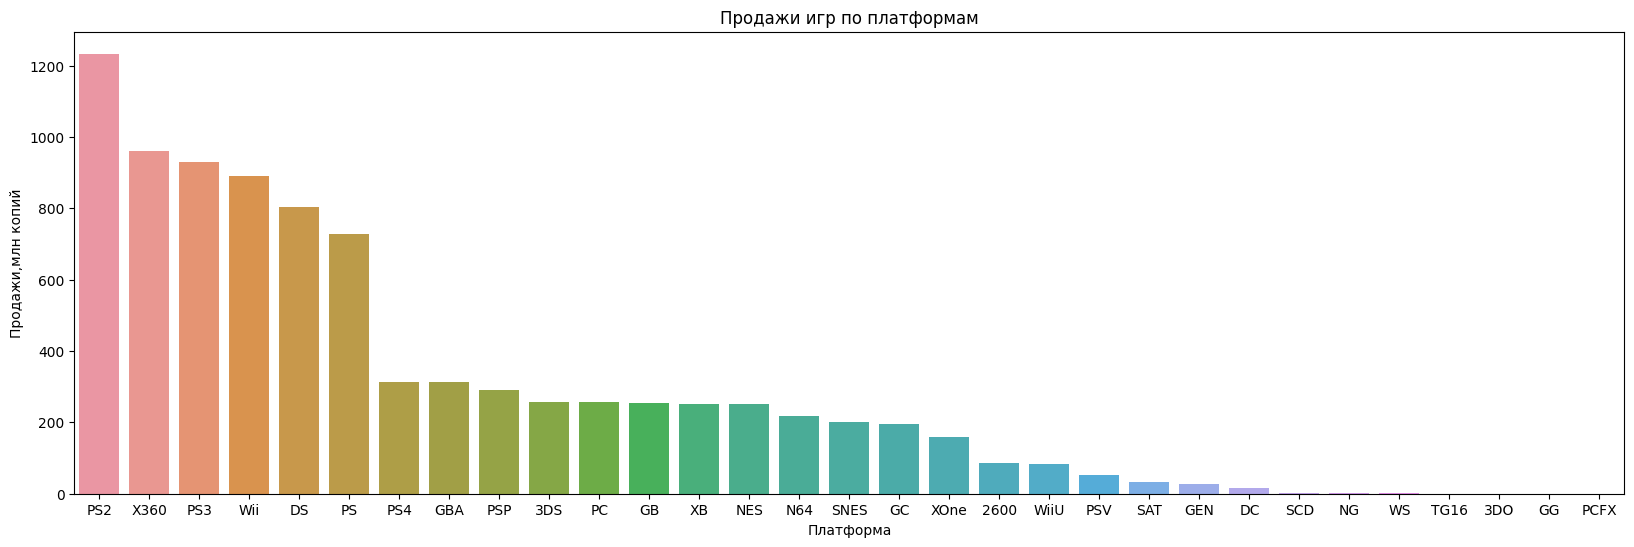

In [29]:
# построение линейной диаграммы выпуска игр по годам
platform_years = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending=False)
platform_years
plt.figure(figsize = (20,6))
sns.barplot( x=platform_years.index, y='total_sales', data=platform_years)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи,млн копий')
plt.show()

In [30]:
# с таблица с данными с годом релиза от 1996
d = data.loc[data['year_of_release'] >1995]
#проверка
print(d['year_of_release'].unique())

[2006 2008 2009 1996 2005 1999 2007 2010 2013 2004 2002 2001 2011 1998
 2015 2012 2014 1997 2016 2003 2000]


In [31]:
# продажи по платформам (млн проданных копий)

plat_sales = d.pivot_table(index = 'platform', values = 'total_sales', aggfunc =  'sum')

print(plat_sales.sort_values(by = 'total_sales', ascending = False))

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.76
PS             685.59
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
XB             251.57
PC             235.57
N64            218.01
GC             196.73
XOne           159.32
GB             136.30
WiiU            82.19
PSV             53.81
SAT             18.37
SNES            17.39
DC              15.95
WS               1.42
NG               0.10
PCFX             0.03


In [32]:
# распределение продаж по годам по всем платформам (взят в расчет весь период, для понимания общего развития платформ)
plat_sales_year = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
#t.fillna(0, inplace=True)
print(plat_sales_year)


platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980             11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981             35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982             28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983              5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984              0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985              0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986              0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987              1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988              0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989              0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
1990               NaN   NaN

Судя по тому, что очень большое количество пустых значений(NaN), напрашивается вывод, что платформы не долговечны. Стоит изучить, сколько в среднем лет существует платформа 

In [33]:
#расчет средней продолжительности жизни платформ
t = plat_sales_year[plat_sales_year.notnull()].count()
#print(t)
t.describe()


count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
dtype: float64

<AxesSubplot:>

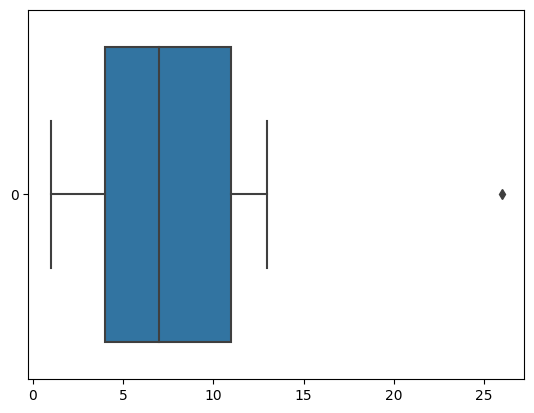

In [34]:
# ящик с усами для средней продолжительности жизни платформы
sns.boxplot(data = t, orient='h')

В среднем платформа существует на рынке ( и приносит доход от продаж) 8 лет.В целом, с учетом быстрого развития информационных систем, вполне звучит реалистично.
Дальше в расчет возьмем только топ 10 для дальнейшего анализа продаж по платформам  и сократим период, оставив данные с 1995г

In [35]:
# топ 10 по продажам в разрезе платформ
plat_sales_top = plat_sales.sort_values(by = 'total_sales', ascending = False).head(10)
print(plat_sales_top)
# преобразование в лист (для возможности сортировки по значению в листе)
plat_sales_top_list = plat_sales_top.index.to_list()
print(plat_sales_top_list)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.76
PS             685.59
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


In [36]:
# продажи по годам в разрезе платформ(топ10), замена NaN  на 0, сокращение периода на период с 1996г

plat_sales_top_year = plat_sales_year[plat_sales_top_list].fillna(0)
plat_sales_top_year = plat_sales_top_year[(plat_sales_top_year.index<2017)&(plat_sales_top_year.index>1995)]
plat_sales_top_year



platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS
year_of_release,,,,,,,,,,
1996,0.00,0.00,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00
2000,39.17,0.00,0.00,0.00,0.00,96.37,0.00,0.07,0.00,0.00
2001,166.43,0.00,0.00,0.00,0.00,35.59,0.00,61.53,0.00,0.00
2002,205.38,0.00,0.00,0.00,0.00,6.67,0.00,74.16,0.00,0.00
2003,184.31,0.00,0.00,0.00,0.00,2.07,0.00,56.67,0.00,0.00
2004,211.81,0.00,0.00,0.00,17.27,0.00,0.00,77.91,7.06,0.00


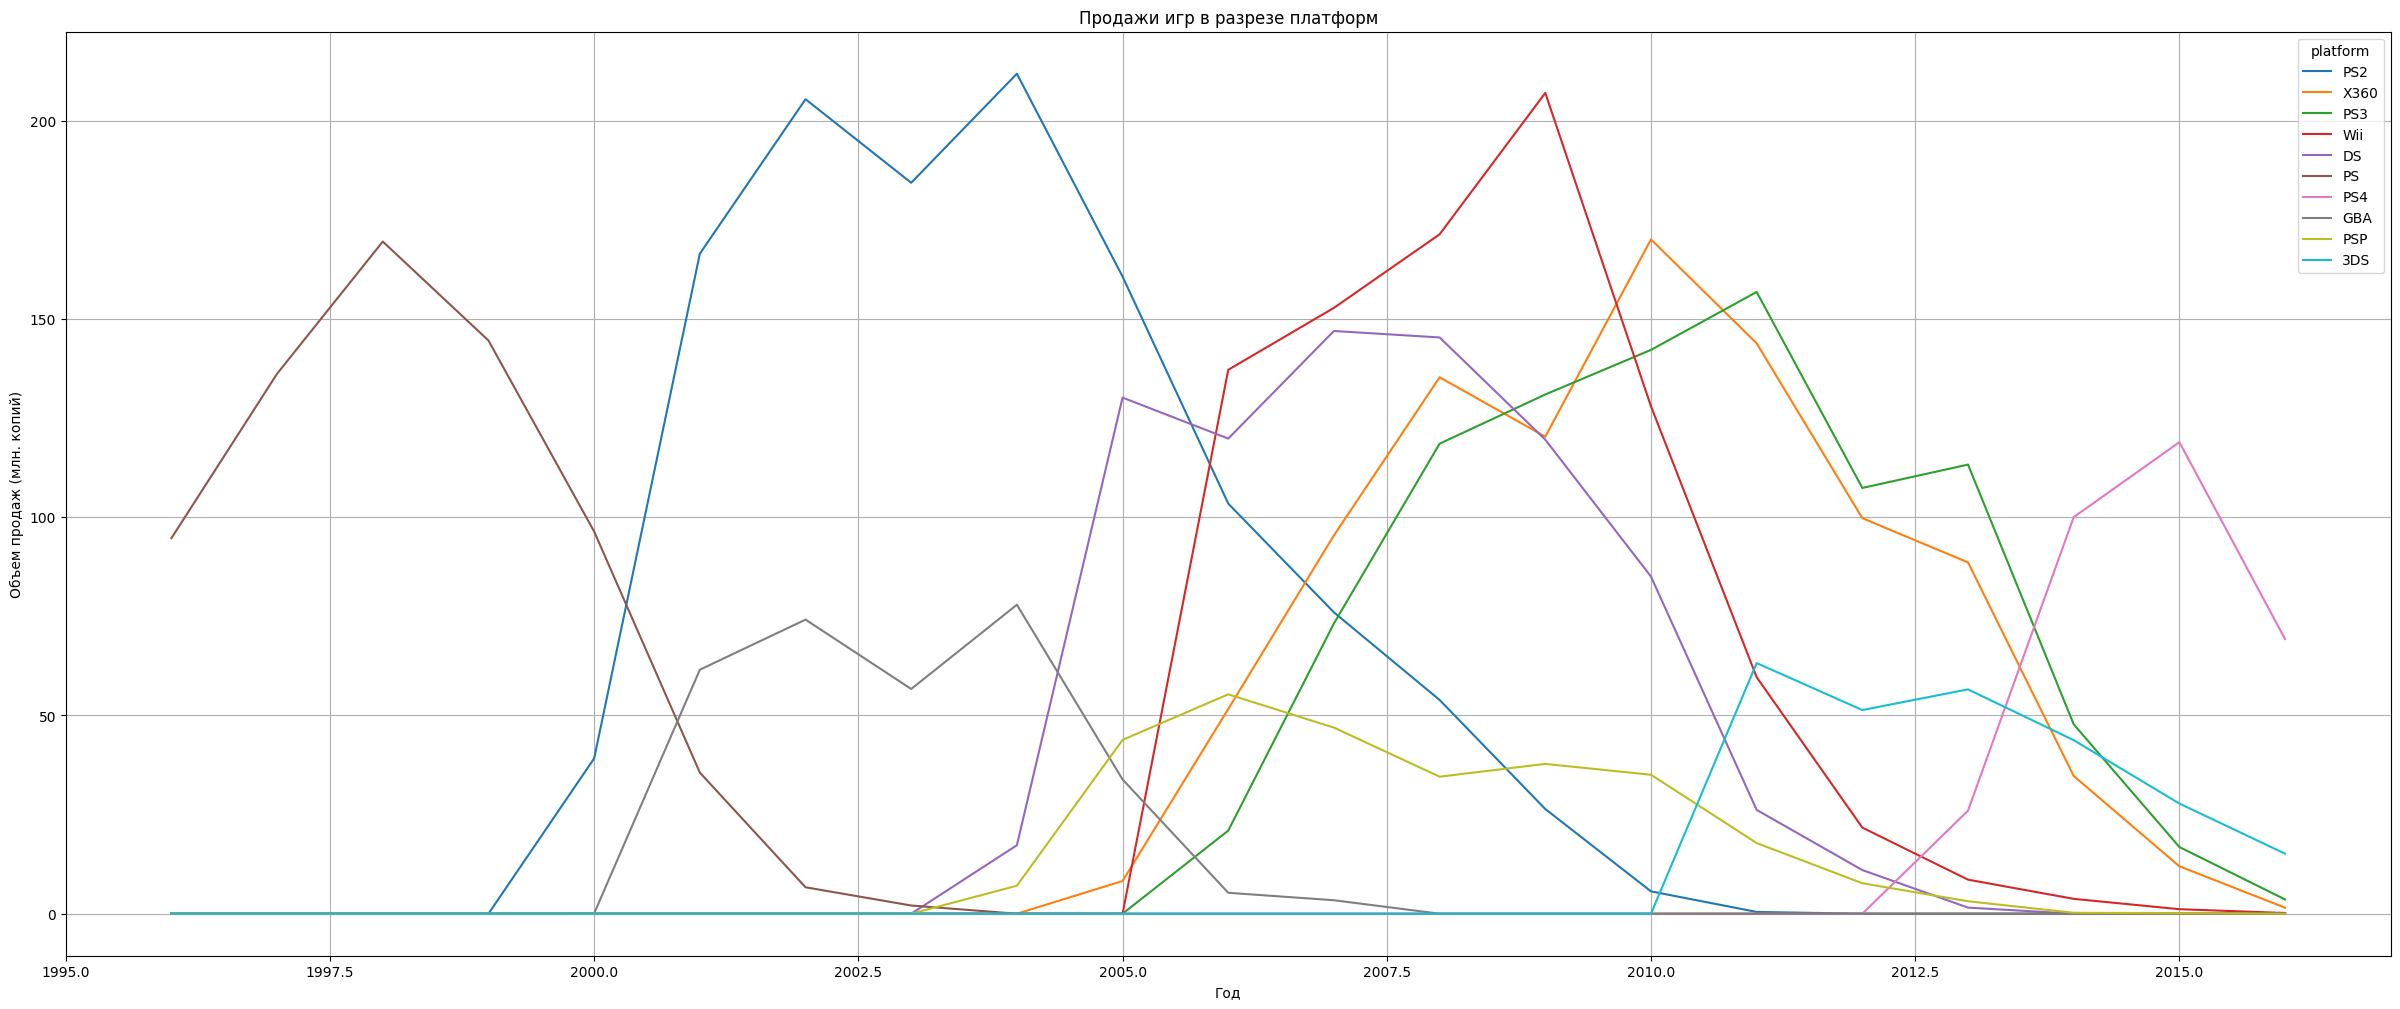

In [37]:
plat_sales_top_year.plot(grid = True,figsize = (30,12) )
plt.title('Продажи игр в разрезе платформ')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн. копий)')

plt.show()

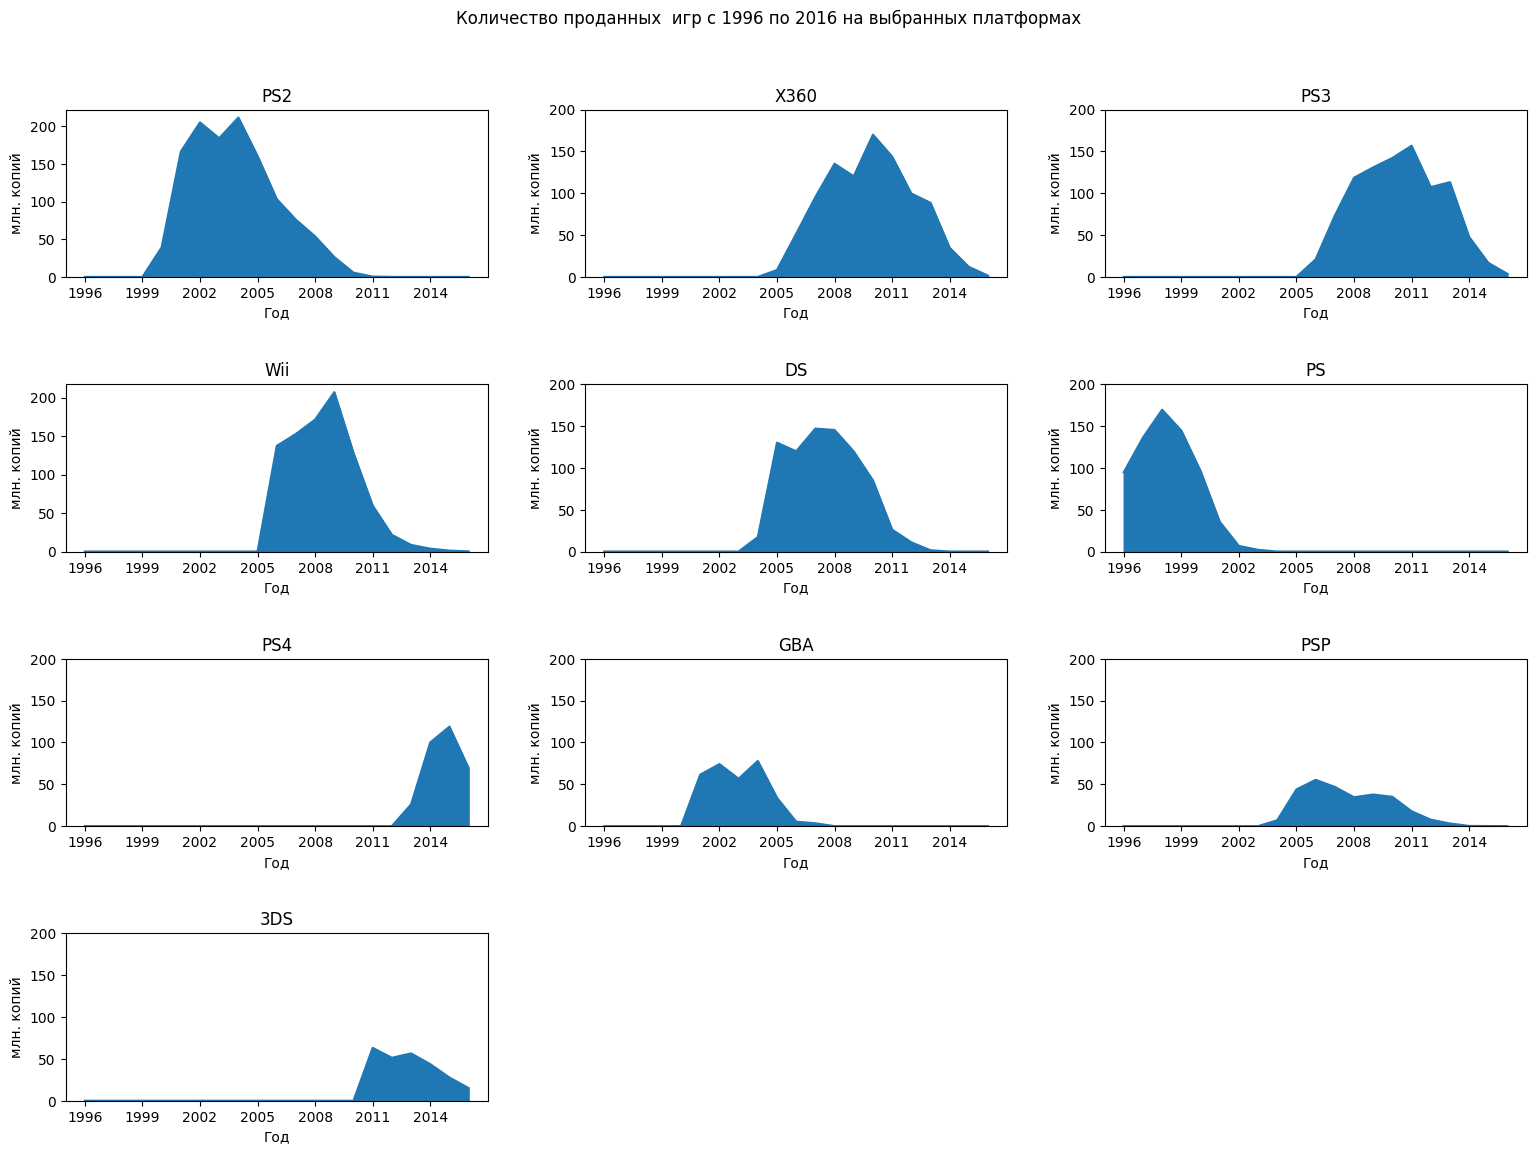

In [38]:

nrows = 4  # ряды
ncols = 3  # столбцы
c = 1  # счётчик для графиков

fig = plt.figure(figsize=(16,12))
fig.suptitle('Количество проданных  игр с 1996 по 2016 на выбранных платформах')
fig.tight_layout(pad = 4.0)
for i in plat_sales_top_year:
    plt.subplot(nrows, ncols, c)
    plt.title(i)
    plat_sales_top_year[i].plot.area()
    plt.xlabel('Год')
    plt.ylabel('млн. копий')
    plt.xticks(np.arange(min(plat_sales_top_year.index), max(plat_sales_top_year.index)+1, 3.0))
    plt.yticks(np.arange(0, 201, 50))
    c = c + 1
fig.tight_layout(pad = 3.0)

         

**Вывод:**

Исходя из графиков и понимания, что в среднем каждая платформа живет 8 лет, можно выделить две платформы PS4 и 3DS. Данные платформы находятся на этапе роста и являются потенциально прибыльными платформами. Остальные платформы уже на стадии "зрелости" или уже близки к полному уходу из рынка.

Для дальнейшего анализа возьмем все платформы, с датой выпуска от 2014 года, чтобы не упустить из внимания те платформы, которые недавно были выпущены(если учитывать, что данные за 2016 год не полные, анализ охватывает 2 полных года и неполный 2016). И дальнейший анализ будем проводить только по этому периоду, так как нет смысла брать в расчет более поздний период.

In [39]:
#общая таблица, с данными, отфильтрованными по 'year_of_release'(c 2014 по 2016)
data2 = data.loc[data['year_of_release'] > 2013]
#проверка
data2['year_of_release'].unique()

array([2015, 2014, 2016])

In [40]:
#распределение продаж по платформам от 2014г
plat_sales_year2 = data2.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum').fillna(0)
plat_sales_year2

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


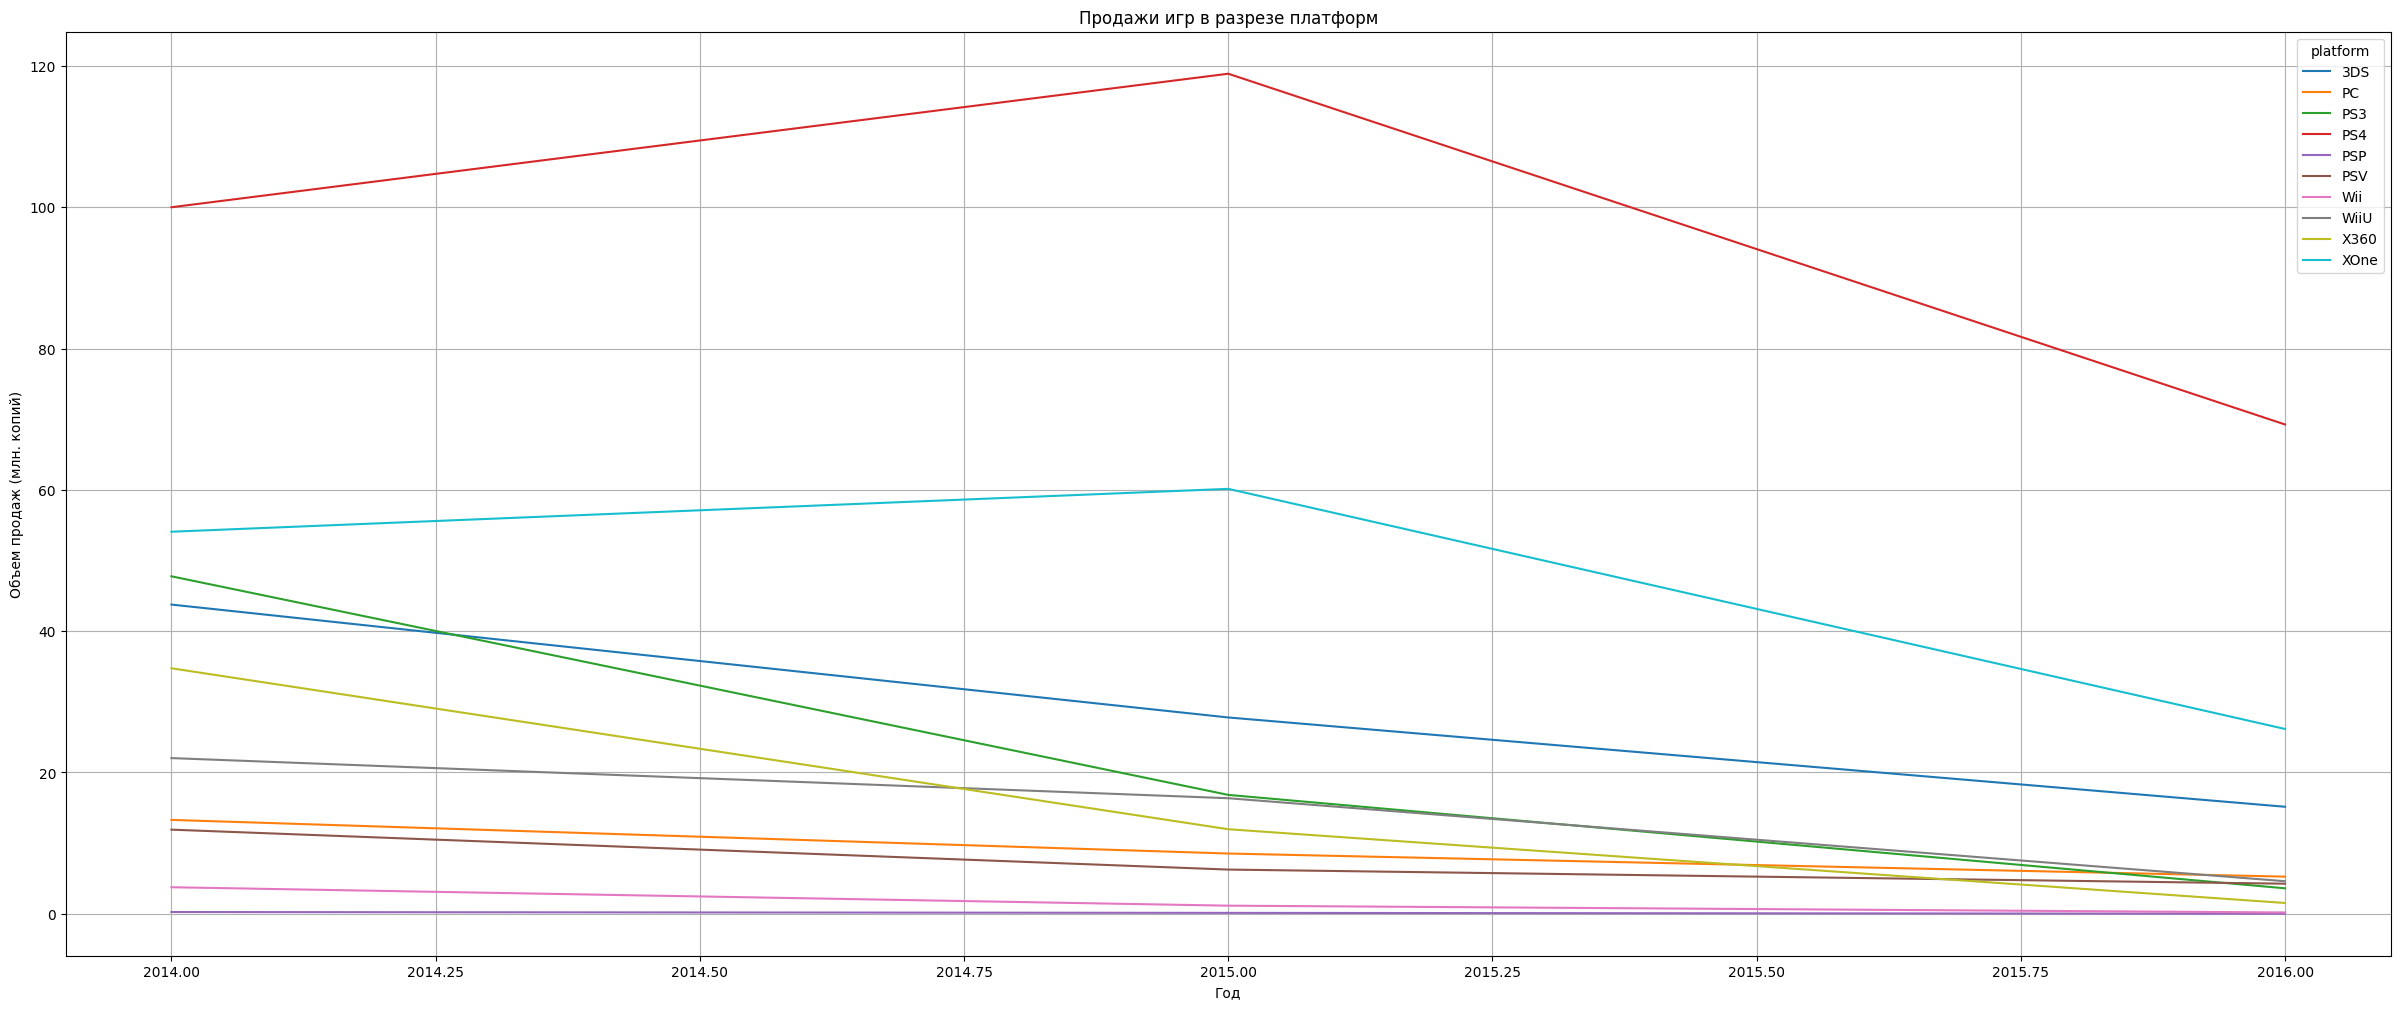

In [41]:
#график продаж платформ от 2014
plat_sales_year2.plot(grid = True,figsize = (30,12) )
plt.title('Продажи игр в разрезе платформ')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн. копий)')

plt.show()

Стоит также выделить платформу XOne, как платформу  потенциально прибыльную.Эта платформа находится на стадии роста и может показать достаточно неплохие результаты

In [42]:
#также уберем из отчета data2 отжившие тренды PSP,Wii,PSV,WiiU,X360
data2 =data2.query('platform != "PSP" & platform != "Wii" & platform != "PSV" & platform != "WiiU" & platform != "X360"')
#проверка
data2['platform'].unique()

array(['PS4', '3DS', 'XOne', 'PS3', 'PC'], dtype=object)

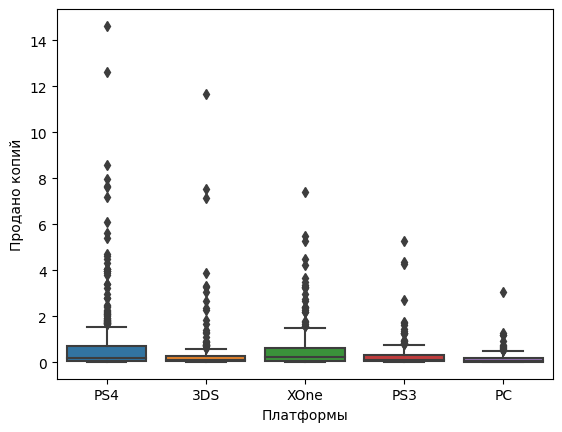

In [43]:
# Ящики с усами для платформ от 2014
sns.boxplot(data=data2, x='platform', y='total_sales')
plt.xlabel('Платформы')
plt.ylabel('Продано копий')
plt.show()

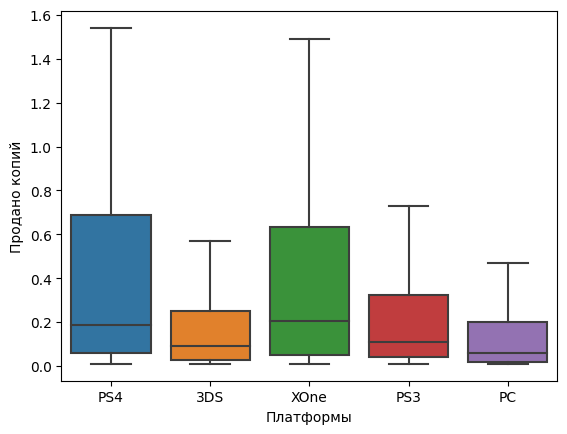

In [44]:
#ящик с усами показал очень много выбросов, "подавим" отображение выбросов
sns.boxplot(data=data2, x='platform', y='total_sales', showfliers = False)
plt.xlabel('Платформы')
plt.ylabel('Продано копий')
plt.show()

**Вывод:**  По потенциально прибыльным платформам ( PS3, PS4, XOne) можно выделить, что медиана находится примерно на значении 0.1-0.2 млн.проданных копий. Верхняя граница продаж варьируется в диапазоне 1.4-1.5млн ( за пределами этих значений уже отдельные выбросы и анамалии)

3. Рассмотрим как влияют на продажи внутри одной платформы (PS4) отзывы пользователей и критиков. 

In [45]:
ps4_sale = data2.query('platform == "PS4" and critic_score > 0 and user_score > 0')
ps4_sale                     


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16484,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16497,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16498,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16524,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


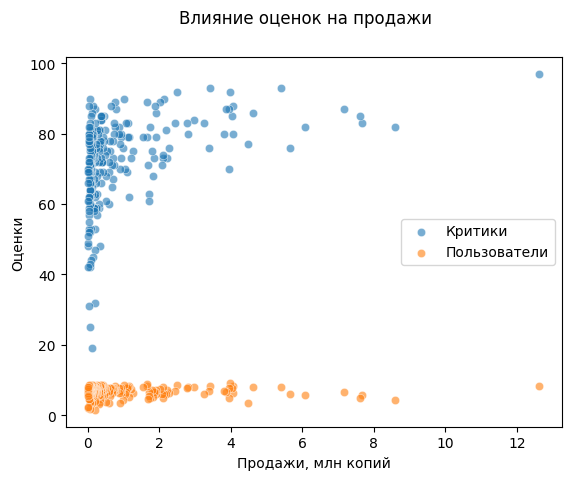

In [46]:
sns.scatterplot(data=ps4_sale, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=ps4_sale, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи, млн копий')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.suptitle('Влияние оценок на продажи')
plt.show()


Сократим диапазон продаж до 2 млн копий

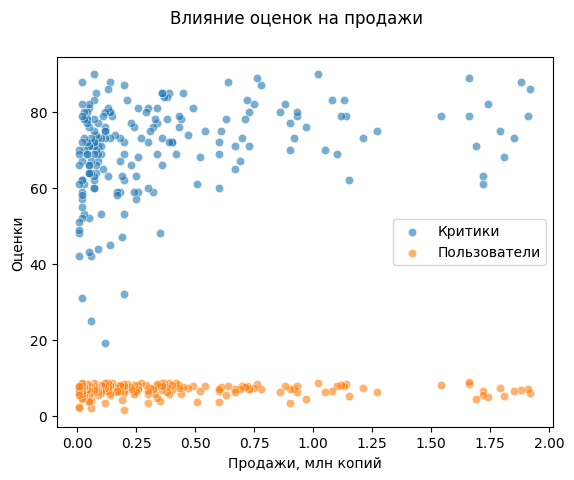

In [47]:
ps4_sale_cut = ps4_sale.query('total_sales<2')
sns.scatterplot(data=ps4_sale_cut, x='total_sales', y='critic_score', alpha=0.6)
sns.scatterplot(data=ps4_sale_cut, x='total_sales', y='user_score', alpha=0.6)
plt.xlabel('Продажи, млн копий')
plt.ylabel('Оценки')
plt.legend(['Критики', 'Пользователи'])
plt.suptitle('Влияние оценок на продажи')
plt.show()

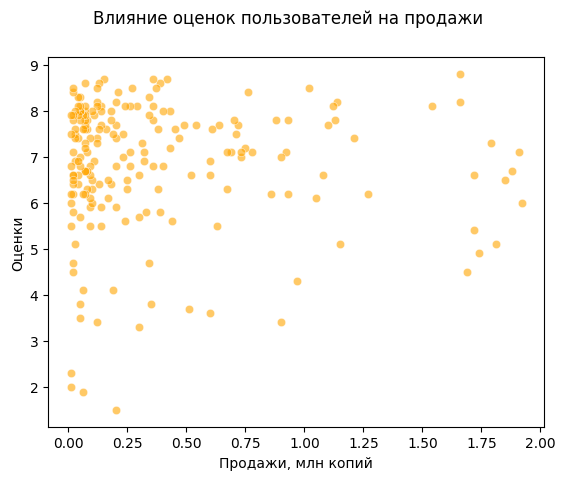

In [48]:
#отдельно график рассеивания по оценкам пользователей
sns.scatterplot(data=ps4_sale_cut, x='total_sales', y='user_score', alpha=0.6, color='orange')
plt.xlabel('Продажи, млн копий')
plt.ylabel('Оценки')
plt.suptitle('Влияние оценок пользователей на продажи')
plt.show()

In [49]:
#Расчет корреляции
ps4_sale[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.546434,-0.043186
critic_score,0.546434,1.000000,0.401903
total_sales,-0.043186,0.401903,1.000000


In [50]:
#Расчет корреляции для игр с продажими более 2 млн
ps4_sale.query('total_sales>2')[['user_score', 'critic_score','total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.538555,-0.151263
critic_score,0.538555,1.000000,0.366003
total_sales,-0.151263,0.366003,1.000000


Согласно,Шкале Чеддока, где расценивается коэффициент корреляции след образом: 
  - 0,1 — 0,3 - слабая связь
  - 0,3 — 0,5 - умеренная связь
  - 0,5 — 0,7 - заметная связь
  - 0,7 — 0,9 - высокая
  - 0,9 — 0,99 - весьма высокая


Можно сделать следующие выводы: наблюдается заметная связь (0.54) между оценкой критиков и количеством продаж, т.е пользователи ориентируются на оценки критиков при совершении покупок, и практически нет связи (-0.04) между оценкой пользователей и продажами.
Даже при рассмотрении игр с продажами от 2млн  также связь заметная (0.53) оценков критиков и продаж.
Больше всего игр оценены критиками баллами от 60 до 80( мах 100) , пользователи также рассценивают игры от 6 до 8.5

Рассмотрим также влияние отзывов на продажи на примере платформы PS3 и Х360, которые показали очень хорошие продажи (в топ 10 входят) и на текущий момент на стадии выхода из рынка, что позволит охватить весь период жизненного цикла платформы


Коэффицент корреляции для оценок пользователей - 0.23

Коэффицент корреляции для оценок критиков - 0.48


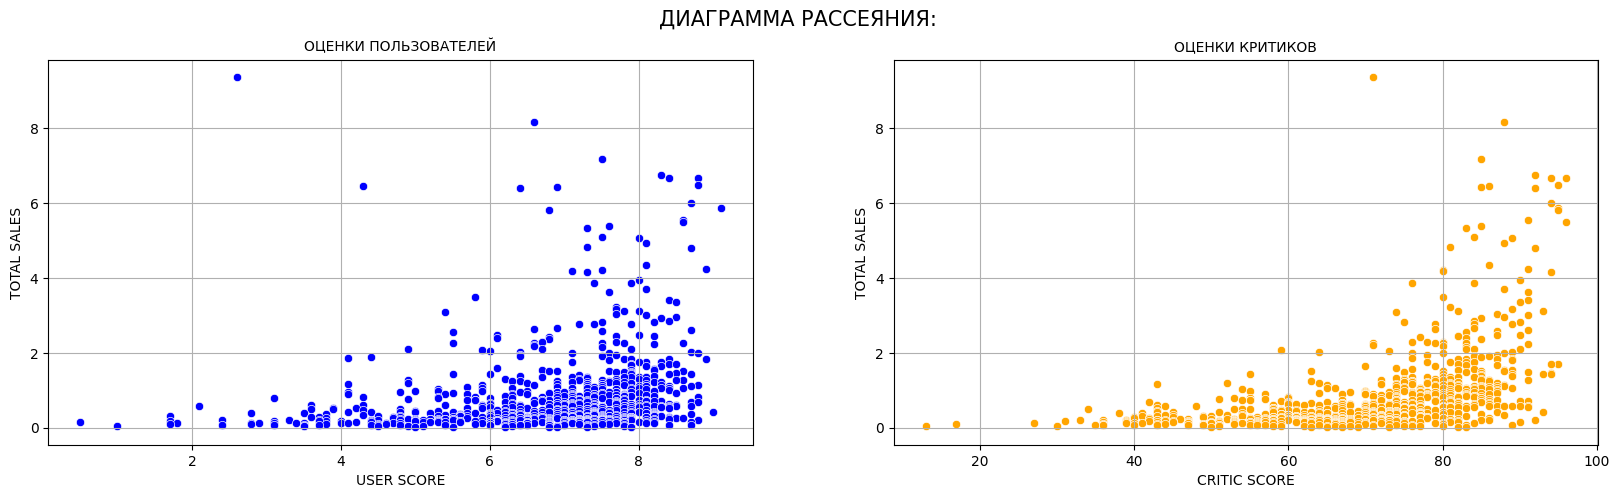

In [51]:
#Расчет коррелиции оценок и продаж по платформе PS3 (за весь период)
ps_3 = data.query('platform == "PS3" & total_sales < 10 & user_score > 0 & critic_score > 0' )

cor_user_score = ps_3['total_sales'].corr(ps_3['user_score'])
cor_critic_score = ps_3['total_sales'].corr(ps_3['critic_score'].astype('float32'))

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user_score:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic_score:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ps_3, color='blue')
plt.ylabel('TOTAL SALES')
plt.xlabel('USER SCORE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('ОЦЕНКИ КРИТИКОВ', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ps_3, color='orange')
plt.ylabel('TOTAL SALES')
plt.xlabel('CRITIC SCORE')
plt.grid(True);


Коэффицент корреляции для оценок пользователей - 0.23

Коэффицент корреляции для оценок критиков - 0.48


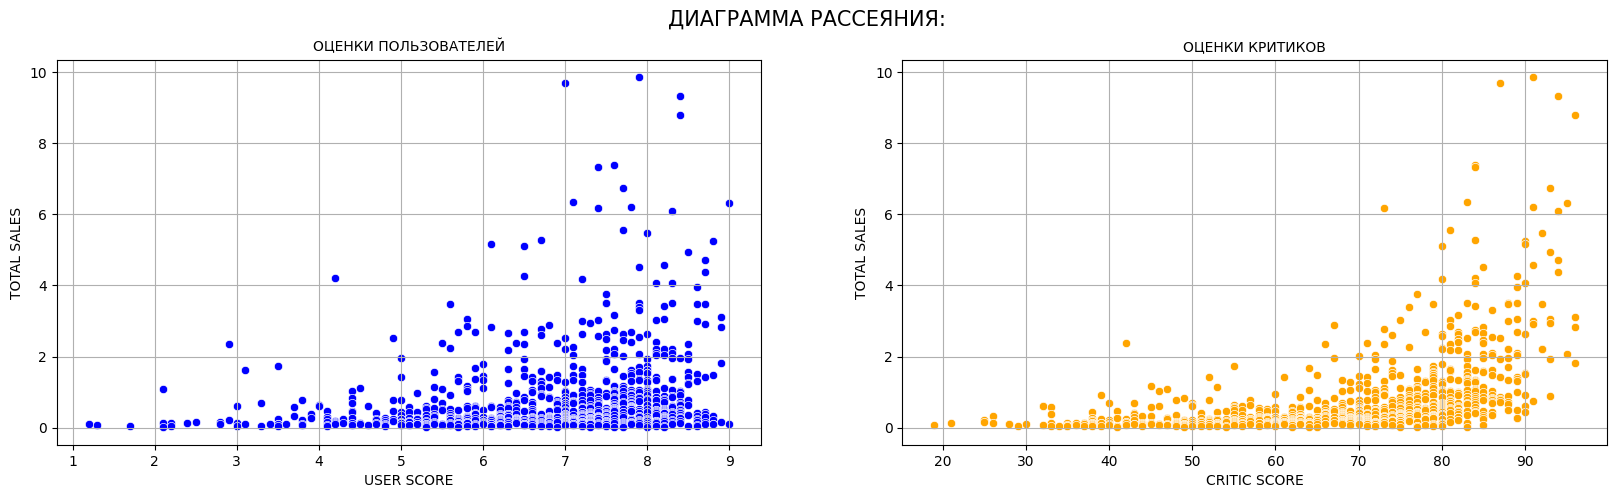

In [52]:
#Расчет коррелиции оценок и продаж по платформе x360(за весь период)
x360 = data.query('platform == "X360" & total_sales < 10 & user_score > 0 & critic_score > 0' )

cor_user_score = x360['total_sales'].corr(x360['user_score'])
cor_critic_score = x360['total_sales'].corr(x360['critic_score'].astype('float32'))

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user_score:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic_score:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('ОЦЕНКИ ПОЛЬЗОВАТЕЛЕЙ', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=x360, color='blue')
plt.ylabel('TOTAL SALES')
plt.xlabel('USER SCORE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('ОЦЕНКИ КРИТИКОВ', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=x360, color='orange')
plt.ylabel('TOTAL SALES')
plt.xlabel('CRITIC SCORE')
plt.grid(True);

Также рассмотрим кооэффициент корреляции по анализируемому периоду (2013-2016), на основе платформ XOne и 3DS

In [53]:
#Корреляция для платформы 'XOne'
XOne = data.query('platform == "XOne" & total_sales < 10 & user_score > 0 & critic_score > 0' )

cor_user_score = XOne['total_sales'].corr(XOne['user_score'])
cor_critic_score = XOne['total_sales'].corr(XOne['critic_score'].astype('float32'))

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user_score:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic_score:.2f}')


Коэффицент корреляции для оценок пользователей - -0.09

Коэффицент корреляции для оценок критиков - 0.41


In [54]:
#Корреляция для платформы '3DS'
pl_3DS = data.query('platform == "3DS" & total_sales < 10 & user_score > 0 & critic_score > 0' )

cor_user_score = pl_3DS['total_sales'].corr(pl_3DS['user_score'])
cor_critic_score = pl_3DS['total_sales'].corr(pl_3DS['critic_score'].astype('float32'))

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user_score:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic_score:.2f}')


Коэффицент корреляции для оценок пользователей - 0.22

Коэффицент корреляции для оценок критиков - 0.31


**Вывод:**

Платформы с полным жизненным циклом показали корреляцию продажи с оценками критиков  в значении 0.48, в более современных платформах корреляция немного ослабевает и составляет 0.31-0.41, но в целом можно подитожить, что наблюдается умеренная связь между продажи и оценками критиков, и слабая связь между продажами и оценками пользователей. 


4. Анализ общего распределение  игр по жанрам

In [55]:
#сводная таблица с расчетом общей прибыли, медианного значения прибыли по каждой категории , кол-ва игр
#(расчет по заданному актуальному периоду - c 2014 по 2016, без учета платформ PSP,Wii,PSV,WiiU,X360)
genre_sales = data2.pivot_table(index = 'genre',
                                values ='total_sales',
                               aggfunc = ['sum','median','count', 'max'])

genre_sales.reset_index(inplace = True) #избавление от индекса
genre_sales.columns = ['genre', 'sum_total_sales', 'median_sales', 'count_games','max_sales']
print(genre_sales.sort_values(by = 'sum_total_sales', ascending= False))


           genre  sum_total_sales  median_sales  count_games  max_sales
0         Action           168.18          0.11          426      12.62
8        Shooter           151.81          0.53          109      14.63
10        Sports            93.41          0.21          125       8.58
7   Role-Playing            91.06          0.16          152      11.68
3           Misc            25.10          0.09           73       5.27
2       Fighting            20.99          0.13           46       7.55
6         Racing            18.69          0.10           57       2.42
1      Adventure            12.96          0.06           92       1.66
9     Simulation            12.67          0.11           39       3.05
4       Platform            10.84          0.15           25       1.91
11      Strategy             3.78          0.06           33       0.52
5         Puzzle             0.93          0.06            9       0.48


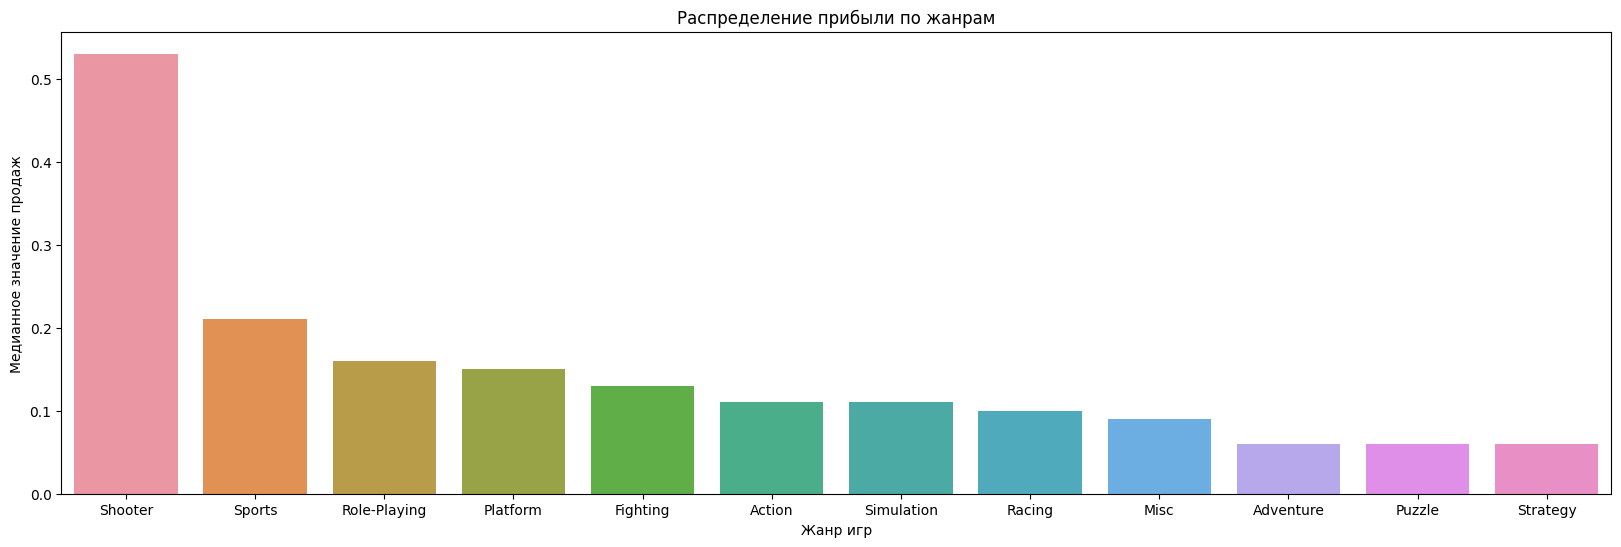

In [56]:
#график по медианному значению распределение прибыли по жанрам
plt.figure(figsize = (20,6))
sns.barplot( x= 'genre', y= 'median_sales', data=genre_sales.sort_values(by = 'median_sales', ascending= False))
plt.title('Распределение прибыли по жанрам')
plt.xlabel('Жанр игр')
plt.ylabel('Медианное значение продаж')
plt.show()

 **Вывод:**

 - Наибольшее количество продаж копий игр приходится на жанр Action, но это преимущество достигается за счет общего количества игр (этом жанре представлено больше всего -426 игр).
 - Также стоит отметить, что максимальное количество продаж приходилось на игру в жанре Shooter(14.63 млн), Action(12.62 млн) и Role-Playing (11.68 млн).
 - Если рассматривать медианы(что даст более точное представление о типичном распределение прибыли по жанрам) выделяются следующие жанры Shooter(0.53млн), Sports(0.21млн),Role-Playing(0.16млн), Platform (0.15млн)за игру. Самой малой популярностью пользуются жанры Puzzle(0.045 млн) и Adventure(0.03 млн)



**Общий вывод по проведение исследовательского анализа данных**

- Активный рост продаж компьютерных игр начинается с 1995 год, пик продаж наблюдается в 2008-2009 году, после 2008 продаджи идут на спад
- Средняя продолжительность жизни платформы - 8 лет.
- Дальнейшее прогнозирование идет от периода с 2014 по 2016, как актуальный период для расчета, и без учета платформ PSP, Wii, PSV, WiiU, X360- так как они уже на стадии зрелости и ухода с рынка
- На текущий момент можно выделить следующие платформы PS4,3DS, XOne, они находятся на этапе роста и являются потенциально прибыльными платформами. Медианное значение продаж в диапазоне 0.1-0.2 млн.проданных копий. Верхняя граница продаж варьируется в диапазоне 1.4-1.5млн
- Наблюдается заметная связь между продажами и оценками критиков, что говорит о том, что пользователи ориентируются на оценки критиков при совершении покупок; и низкая связь между продажами и оценками пользователей (современный потребитель не сколен делать выбор в пользу какой-то игры на основании оценок других людей)
- Наиболее прибыльными жанрами являются Shooter(медиана 0.53млн), Sports(0.21млн),Role-Playing(0.16млн),Platform (0.15млн), наименее прибыльные Puzzle(0.045 млн) и Adventure(0.03 млн)



##  Составление портрета пользователя каждого региона

**1. Анализ продаж по платформам в разрезе каждого региона**

In [57]:
#вывод таблицы с распределением продаж  по платформам в разрезе каждого региона (расчет по медиане,период 2014-2016)
platform_top = data2.pivot_table(index='platform', 
                                 values = ['na_sales','eu_sales','jp_sales'],
                                 aggfunc = 'median')
platform_top

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.00,0.055,0.00
PC,0.05,0.000,0.00
PS3,0.01,0.020,0.02
PS4,0.07,0.015,0.05
XOne,0.07,0.000,0.10


Так как предпочтения у каждого региона свои достаточно сложно на общей таблице выделить топ5 по каждому региону.
Разделим каждую таблицу, выделив топ5, остальные платформы обьединим в группу 'другие'

In [58]:
def get_sales_platform(region: str):
    platform_sales = data2.pivot_table(index = 'platform',
                                values = region,
                               aggfunc = 'median').sort_values(by= region, ascending= False)
    platform_sales.reset_index(inplace = True) # избавление от индекса
    top5 = platform_sales['platform'].head(5).to_list() #лист с топ 5
    platform_sales['platform1'] = platform_sales['platform'].where(platform_sales['platform'].isin (top5),"Other") 
    return platform_sales

In [135]:
#Вывод на экран получившиеся таблицы(топ продаж по платформам в разрезе каждого региона)
region =['na_sales','eu_sales','jp_sales']
for i in region:
    display(get_sales_platform(i).groupby('platform1').sum().sort_values(by=i,ascending= False))

,na_sales
platform1,
XOne,0.10
PS4,0.05
PS3,0.02
3DS,0.00
PC,0.00


,eu_sales
platform1,
PS4,0.07
XOne,0.07
PC,0.05
PS3,0.01
3DS,0.00


,jp_sales
platform1,
3DS,0.055
PS3,0.020
PS4,0.015
PC,0.000
XOne,0.000


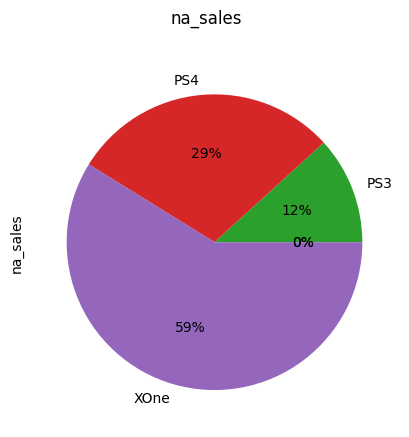

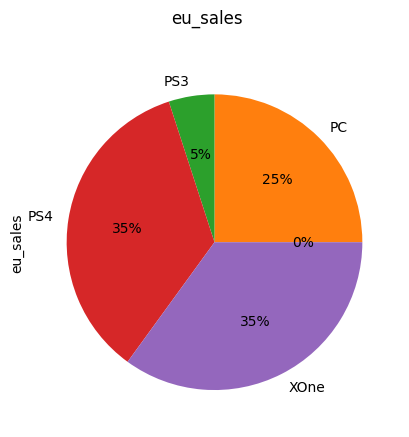

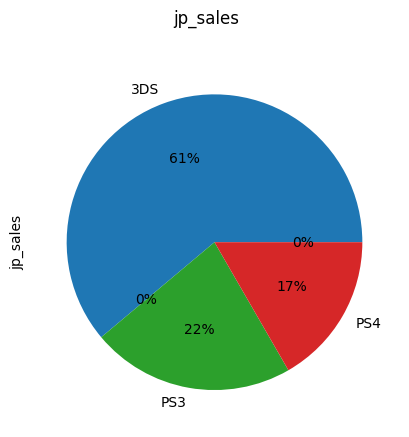

In [59]:
#графики распределения доли продаж по платформам
region =['na_sales','eu_sales','jp_sales']
for i in region:
    get_sales_platform(i).groupby('platform1').sum().plot.pie(subplots=True,normalize=True, title=i,
                                                              autopct='%1.0f%%', legend = False)
    plt.show()



**Вывод:**

Предпочтение платформ в каждом регионе индивидуальны: в северной Америке в топе XOne (59% доли продаж от продажи всех платформ) и PS4 (29%), в Европе - PS4 и XOne(по 35% доля продаж), в Японии с большим разрывом лидирует 3DS(61%),  и за ней следуют PS3(22%) и PS4 (17%)

**2. Анализ продаж по жанрам в разрезе каждого региона**

In [60]:
# формирование таблицы с расчетом медианы по каждому жанру в разрезе каждого региона
#создание функции для выполнении всех действий 
def get_sales_region(region: str):
    genre_sales = data2.pivot_table(index = 'genre',
                                values = region,
                               aggfunc = 'median').sort_values(by= region, ascending= False)
    genre_sales.reset_index(inplace = True) # избавление от индекса
    top5 = genre_sales['genre'].head(5).to_list() #лист с топ 5
    genre_sales['genre1'] = genre_sales['genre'].where(genre_sales['genre'].isin (top5),"Other") 
    return genre_sales


In [61]:
# вывод таблиц по каждому региону(в том числе для проверки правильного присвоения значений other в колонку genre1)
region =['na_sales','eu_sales','jp_sales']
for i in region:
    display(get_sales_region(i))



,genre,na_sales,genre1
0,Shooter,0.220,Shooter
1,Platform,0.080,Platform
2,Sports,0.060,Sports
3,Fighting,0.045,Fighting
4,Role-Playing,0.035,Role-Playing
5,Racing,0.030,Other
6,Action,0.020,Other
7,Misc,0.020,Other
8,Adventure,0.010,Other
9,Puzzle,0.000,Other


,genre,eu_sales,genre1
0,Shooter,0.23,Shooter
1,Platform,0.06,Platform
2,Sports,0.06,Sports
3,Racing,0.05,Racing
4,Simulation,0.04,Simulation
5,Action,0.03,Other
6,Fighting,0.02,Other
7,Role-Playing,0.02,Other
8,Strategy,0.02,Other
9,Adventure,0.01,Other


,genre,jp_sales,genre1
0,Puzzle,0.040,Puzzle
1,Role-Playing,0.040,Role-Playing
2,Fighting,0.035,Fighting
3,Action,0.000,Action
4,Adventure,0.000,Adventure
5,Misc,0.000,Other
6,Platform,0.000,Other
7,Racing,0.000,Other
8,Shooter,0.000,Other
9,Simulation,0.000,Other


<AxesSubplot:title={'center':'Japan'}, ylabel='jp_sales'>

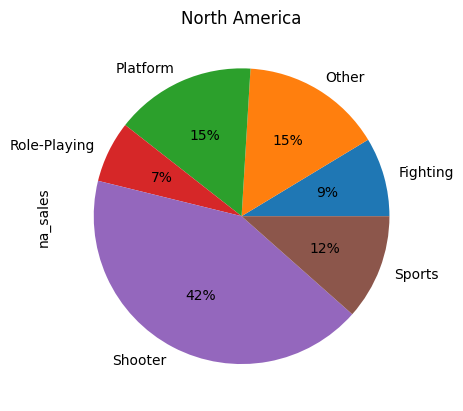

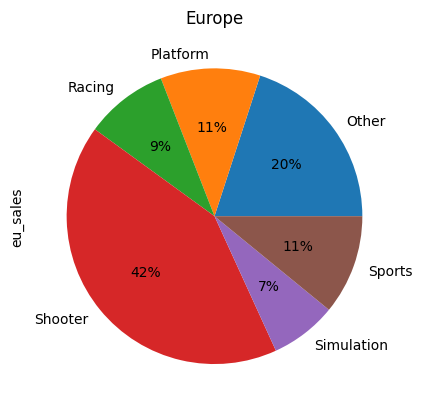

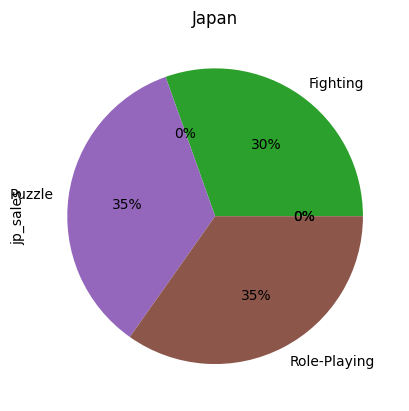

In [62]:
#построение круговых диаграмм
get_sales_region('na_sales').groupby('genre1').sum().plot(kind='pie', y='na_sales',autopct='%1.0f%%',
                                                          normalize=True,title='North America', legend= False)
get_sales_region('eu_sales').groupby('genre1').sum().plot(kind='pie', y='eu_sales',autopct='%1.0f%%',
                                                          normalize=True,title='Europe', legend= False)
get_sales_region('jp_sales').groupby('genre1').sum().plot(kind='pie', y='jp_sales',autopct='%1.0f%%',
                                                          normalize=True,title='Japan',legend= False)



**Вывод:**

Предпочтение платформ в каждом регионе индивидуальны: в северной Америке в топе XOne (59% доли продаж от продажи всех платформ) и PS4 (29%), в Европе - PS4 и XOne(по 35% доля продаж), в Японии с большим разрывом лидирует 3DS(61%), и за ней следуют PS3(22%) и PS4 (17%)

**3. Анализ влияния рейтинга ESRB на продажи в отдельных регионах**

In [63]:
#преобразование таблицы с помощью melt (столбцы na_sales,eu_sales,jp_sales переходят в ст.Region_sales, значения-в value)
cols = data2.columns.to_list()
melted_data2 = pd.melt(data2, 
                    id_vars=['name','platform','year_of_release','genre','other_sales','critic_score','user_score',
                             'rating','total_sales'], # столбцы без изменений
                    var_name="region_sales", value_name = 'value') # Name of melted variable
# ввод заглушек
melted_data2 = melted_data2.query('user_score > 0 & critic_score > 0 & value > 0' )
melted_data2.head()

,name,platform,year_of_release,genre,other_sales,critic_score,user_score,rating,total_sales,region_sales,value
1,Grand Theft Auto V,PS4,2014,Action,1.97,97.0,8.3,M,12.62,na_sales,3.96
3,FIFA 16,PS4,2015,Sports,1.28,82.0,4.3,E,8.58,na_sales,1.12
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,1.23,83.0,5.7,M,7.66,na_sales,2.81
6,FIFA 17,PS4,2016,Sports,1.11,85.0,5.0,E,7.60,na_sales,0.66
9,Fallout 4,PS4,2015,Role-Playing,1.13,87.0,6.5,M,7.17,na_sales,2.53


In [64]:
#проверка
melted_data2['region_sales'].unique()

array(['na_sales', 'eu_sales', 'jp_sales'], dtype=object)

In [64]:
#проверка графика
#melted_data2.groupby(['region_sales','rating'])['value'].mean()

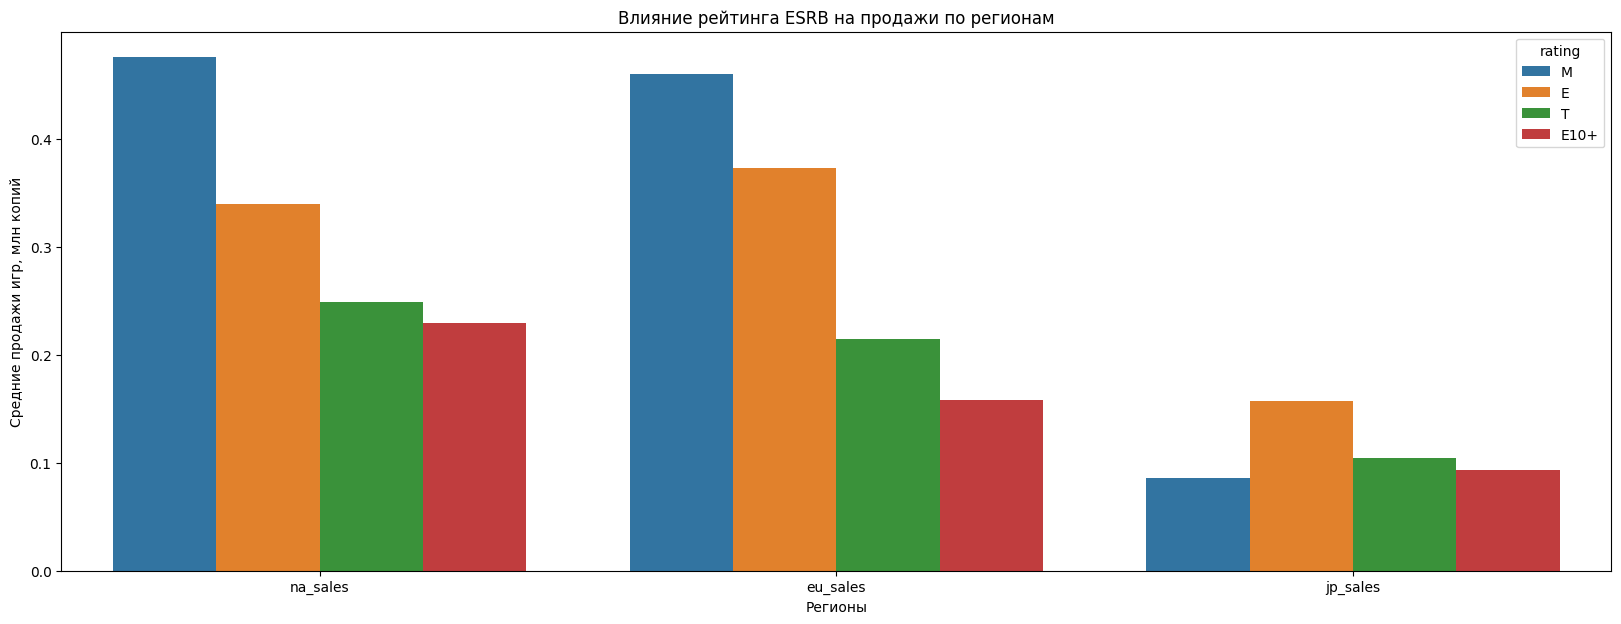

In [65]:
# график распределения продаж по регионам и рейтингу игр
plt.figure(figsize = (20,7))
sns.barplot( x = 'region_sales', hue = 'rating', y= 'value', data=melted_data2, ci=0)
plt.title('Влияние рейтинга ESRB на продажи по регионам')
plt.xlabel('Регионы')
plt.ylabel('Средние продажи игр, млн копий')

plt.show()

**Вывод:**

В Северной Америке и Европе распределение продаж по рейтингам игр ESRB практически идентично, больше всего продаж приходится на игры для взрослых (M) и универсальных для всех (Е). В Японии  на первом месте игры для подростков(Т) и универсальных для всех (E), что в очередной раз подчеркивает идентичность Японии. Можно предположить,что основная аудитория - это подрстки, т.к взросные посвещают очень много времени работе, на игры у них практически не остается времени.

**Общий вывод по портрету пользователя:**
 - Игровые предпочтения  в Северной Америке схожи с предпочтениями в Европе. Больший спрос на игры для взрослых и универсальные игры для всех,в жанрах лидируют Shooter (42% доля продаж), Platform(11-15%) и Sports (11-12%). Предпочтения по платформам: XOne (59% в Северной Америке и 35% в Европе), PS4 (29% в Северной Америке и 35% в Европе).
 - Предпочтения в Японии складываются по иному сценарию. В основном это продажи игр для подростков и на втором месте универсальные игры для всех.По жанрам предпочтения: Role-Playing (35%), Puzzle (35%), Fighting(30%), по платформам лидирует 3DS(61%), и за ней следуют PS3 (22%), PS4 (17%)






##  Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различны(т.е. не равны)

In [66]:
#статистический расчет гипотезы о равенстве рейтингов платформ XOne  и PC
rating_XOne = data2.query('platform == "XOne" & user_score > 0')['user_score']
rating_PC = data2.query('platform == "PC" & user_score > 0')['user_score']
alpha = .05 #уровень статистической значимости
results = st.ttest_ind(rating_XOne,rating_PC)
print ('p-значения:', results.pvalue)

if results.pvalue < alpha:
    print ('Опровергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значения: 0.10450507919348415
Не получилось опровергнуть нулевую гипотезу


In [67]:
#проверка средних значений оценок пользователей
print('Средняя оценка платформы XOne:', rating_XOne.mean().round(3))
print('Средняя оценка платформы PC:',rating_PC.mean().round(3))

Средняя оценка платформы XOne: 6.595
Средняя оценка платформы PC: 6.298


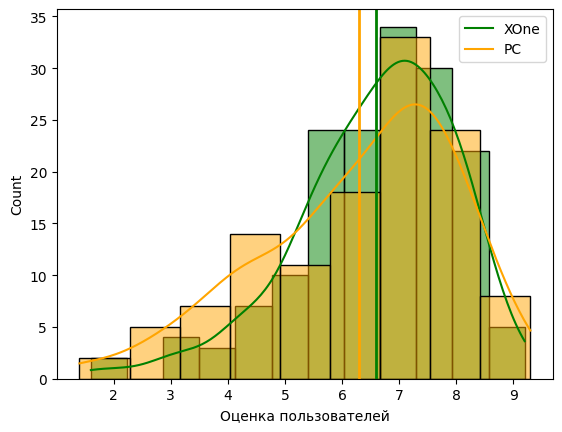

In [68]:
#график распределения пользовательского рейтинга (для проверки статистической гипотезы)
sns.histplot(rating_XOne, color = 'green', alpha=0.5, kde =True)
sns.histplot(rating_PC, color = 'orange', alpha=0.5, kde =True)
plt.axvline(rating_XOne.mean(), linewidth=2, color = 'green', alpha=1)
plt.axvline(rating_PC.mean(), linewidth=2, color = 'orange', alpha=1)

plt.xlabel('Оценка пользователей')
plt.legend(['XOne', 'PC'])
plt.show()

**Вывод:** Не получилсь опровергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые(p-value меньше критического уровня значимости). Они действительно близки,что подтверждает график. 

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

In [69]:
#статистический расчет гипотезы о равенстве пользовательских рейтингов жанров Action и Sports 
rating_Action = data2.query('genre == "Action" & user_score > 0')['user_score']
rating_Sports = data2.query('genre == "Sports" & user_score > 0')['user_score']
alpha = .05 #уровень статистической значимости
results = st.ttest_ind(rating_Action,rating_Sports)
print ('p-значения:', results.pvalue)

if results.pvalue < alpha:
    print ('Опровергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значения: 2.39406360718228e-12
Опровергаем нулевую гипотезу


In [70]:
#проверка средних значений оценок пользователей по жанрам
print('Средняя оценка жанра Action:',rating_Action.mean().round(3))
print('Средняя оценка жанра Sports:', rating_Sports.mean().round(3))

Средняя оценка жанра Action: 6.688
Средняя оценка жанра Sports: 5.362


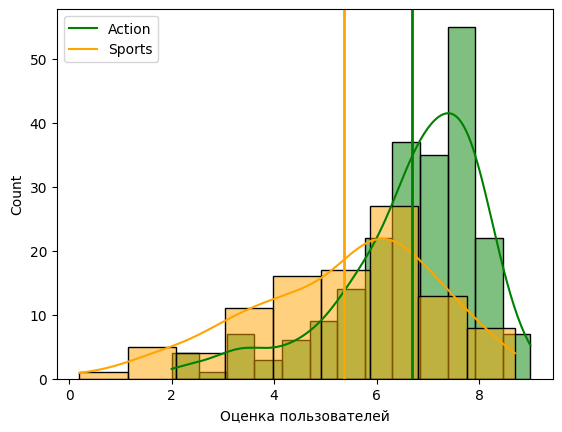

In [71]:
#график распределения пользовательского рейтинга (для проверки статистической гипотезы)
sns.histplot(rating_Action, color = 'green', alpha=0.5, kde =True)
sns.histplot(rating_Sports, color = 'orange', alpha=0.5, kde =True)
plt.axvline(rating_Action.mean(), linewidth=2, color = 'green', alpha=1)
plt.axvline(rating_Sports.mean(), linewidth=2, color = 'orange', alpha=1)

plt.xlabel('Оценка пользователей')
plt.legend(['Action', 'Sports'])
plt.show()

**Вывод:**
Гипотеза, о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные потверждена. Также это наглядно иллюстрирует график, средние находятся на достаточном расстоянии друг от друга.


**Общий вывод по проверке гипотез**


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза подтвердждена;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - гипотеза подтверждена ( вернее статистический анализ опреверг нулевую гипотезу, о равности значений, что подтверждает,что рейтинги жанров разные)

##  Общий вывод:

**В ходе анализа были совершены следующие действия над данными:**
   - скоректированы типы данных (`user_score`,`year_of_release`);
   - заполнены пустые значения на 0(`critic_score`, `user_score`), 
   - добавлен столбце с общией суммой продаж по всем регионам(`total_sales`);
  
    
**При проведении исследовательского анализа данных было выявлено:**
 - Активный рост продаж компьютерных игр начинается с 1995 год, пик продаж наблюдается в 2008-2009 году, после 2008 продажи идут на спад
 - Средняя продолжительность жизни платформы - 8 лет. Можно выделить следующие платформы PS4,3DS, XOne, они находятся на этапе роста и являются потенциально прибыльными платформами. Медианное значение продаж в диапазоне 0.1-0.2 млн.проданных копий. Верхняя граница продаж варьируется в диапазоне 1.4-1.5млн
- Наблюдается заметная связь между продажами и оценками критиков, что говорит о том, что впотребители ориентируются на оценки критиков при соверщении покупок; и низкая связь между продажами и оценками пользователей (современный потребитель не сколен делать выбор в пользу какой-то игры на основании оценок других людей)
- Наиболее прибыльными жанрами являются Shooter(медиана 0.53млн), Sports(0.21млн),Platform (0.14млн), наименее прибыльные Puzzle(0.045 млн) и Adventure(0.03 млн)



**Анализ портрета пользователя показывает:**

- Игровые предпочтения в Северной Америке схожи с предпочтениями в Европе. Больший спрос на игры для взрослых и универсальные игры для всех,в жанрах лидируют Shooter (42% доля продаж), Platform(11-15%)и Sports(11-12%). Предпочтения по платформам: XOne (59% в Северной Америке и 35% в Европе), PS4 (29% в Северной Америке и 35% в Европе).
- Предпочтения в Японии складываются по иному сценарию. В основном это продажи игр для подростков и на втором месте универсальные игры для всех.По жанрам предпочтения: Role-Playing (35%), Puzzle (35%), Fighting(30%), по платформам лидирует 3DS(61%), и за ней следуют PS3 (22%), PS4 (17%)


**Прогноз и дальнейшие рекомендации**
- Рынок продаж игр будет показывать снижение продаж по отношению к предыдущим годам .В 2017 году можем ожидать выхода большего количества игр, но меньшей выручки от их продаж. Особое внимание следует уделить играм жанров: Shooter, Platform, Action, Sports, Roleplaying


